In [1]:
import cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tarfile
import datetime

In [2]:
cifar10.data_path="data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names=cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
print(images_train.shape)
print(cls_train.shape)
print(labels_train.shape)

(50000, 32, 32, 3)
(50000,)
(50000, 10)


In [7]:
images_train_reshaped = images_train.reshape((50000,32*32*3))
images_train_reshaped.shape

(50000, 3072)

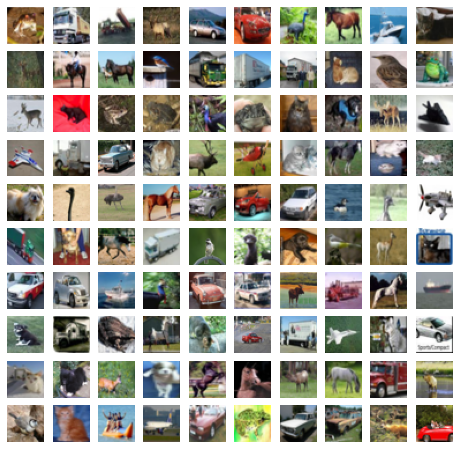

In [8]:
fig=plt.figure(figsize=(8,8))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1)
    ax.imshow(images_train[i])
    ax.axis('off')
plt.show()

In [9]:
a = datetime.datetime.now()

pca=PCA(whiten = True)
pca.fit(images_train_reshaped)

b = datetime.datetime.now()

c = b-a

print(c.total_seconds() /60)

0.74381665


In [10]:
k=0
total=sum(pca.explained_variance_)
currentsum=0
while currentsum/total < 0.99:
    currentsum+=pca.explained_variance_[k]
    k=k+1
k

658

In [11]:
a = datetime.datetime.now()

pca=PCA(n_components=k,whiten = True)
images_train_reshaped=pca.fit_transform(images_train_reshaped)
print(images_train_reshaped.shape)

b = datetime.datetime.now()

c = b-a

print(c.total_seconds() /60)



(50000, 658)
0.38073616666666665


In [12]:
images_approx=pca.inverse_transform(images_train_reshaped)
images_approx=images_approx.reshape((50000,32,32,3))
images_approx.shape

(50000, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

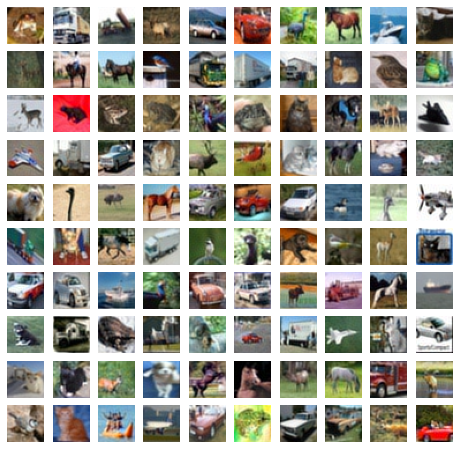

In [13]:
fig=plt.figure(figsize=(8,8))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1)
    ax.imshow(images_approx[i])
    ax.axis('off')
plt.show()

In [14]:
eigen = pca.components_
print(eigen.shape)
eigenf = eigen.reshape((658,32,32,3))
print(eigenf.shape)

(658, 3072)
(658, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

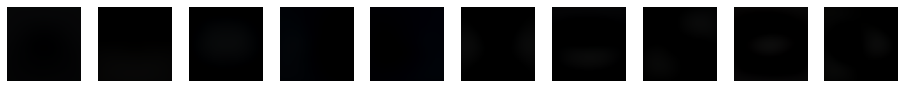

In [15]:
fig=plt.figure(figsize=(16,16))
for i in range(10):
    ax=fig.add_subplot(10,10,i+1)
    ax.imshow(eigenf[i])
    ax.axis('off')
plt.show()

In [16]:
images_test_reshaped=images_test.reshape((10000,32*32*3))
images_test_reshaped.shape

(10000, 3072)

In [17]:
images_test_transformed = pca.transform(images_test_reshaped)
images_test_transformed.shape

(10000, 658)

In [18]:
a = datetime.datetime.now()

rf_clf=RandomForestClassifier()
rf_clf.fit(images_train_reshaped,cls_train)

b = datetime.datetime.now()

c = b-a

print(c.total_seconds() /60)

2.248568533333333


In [19]:
cls_pred=rf_clf.predict(images_test_transformed)
print(classification_report(cls_test,cls_pred))

              precision    recall  f1-score   support

           0       0.44      0.49      0.46      1000
           1       0.42      0.51      0.46      1000
           2       0.27      0.23      0.25      1000
           3       0.27      0.24      0.25      1000
           4       0.38      0.38      0.38      1000
           5       0.31      0.29      0.30      1000
           6       0.44      0.45      0.45      1000
           7       0.41      0.34      0.37      1000
           8       0.49      0.54      0.51      1000
           9       0.41      0.42      0.41      1000

    accuracy                           0.39     10000
   macro avg       0.38      0.39      0.39     10000
weighted avg       0.38      0.39      0.39     10000



In [ ]:
# for optimization of accuracy



clf=SVC()
grid={'C':[1e2,1e4,1e1,5e3,1e3,5e2],
      'gamma':[1e-3,1e-2,5e-3,5e-2,1e-4,1e-5]}

a = datetime.datetime.now()

svm=GridSearchCV(clf,grid)
svm.fit(images_train_reshaped,cls_train)

b = datetime.datetime.now()

c = b-a

print(c.total_seconds() /60)

In [ ]:
# for checking the accuracy

y_pred = svm.predict(images_test_transformed)
print(svm.score(cls_test,y_pred))

In [ ]:
predictions=[]
for i in range(len(cls_pred)):
    predictions.append(class_names[cls_pred[i]])
predictions

In [ ]:
# for saving the results

np.savetxt("predictions_2.csv", predictions, delimiter=',', fmt="%s")
